In [17]:
# Libraries
import pandas as pd
import plotly.express as px
import datetime
from darts import TimeSeries
from darts.models import ExponentialSmoothing

In [71]:
df=pd.read_csv('sensor_data.csv')
df.head()

,time,SensorA,SensorB,SensorC
0,00:00,1.416250,4.219930,3.139646
1,00:01,3.534439,NaN,3.064088
2,00:02,5.659733,NaN,2.925565
3,00:03,5.640167,3.073650,5.381210
4,00:04,4.454474,1.554044,1.055965


We see this start at midnight and ends 24h later.

In [72]:
df.tail()

,time,SensorA,SensorB,SensorC
1435,23:55,8.417096,4.686364,9.014305
1436,23:56,12.413407,5.709658,7.005713
1437,23:57,11.400624,7.063344,7.522029
1438,23:58,9.707463,7.903916,NaN
1439,23:59,11.220124,8.270642,6.609032


In [73]:
#Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     1440 non-null   object 
 1   SensorA  1303 non-null   float64
 2   SensorB  1205 non-null   float64
 3   SensorC  1392 non-null   float64
dtypes: float64(3), object(1)
memory usage: 45.1+ KB


We can see some missing values in each sensor columns.
We also have a time column.
We can interpret this dataset in different ways. We do not have so much information so we can either say all the sensors are on the same spot and we can do the average of the 3. Or we can treat them individually assuming they are placed on different spots.

From the graph we can see the diffrence in measurements for the same time. So We hope those sensors are not based on the same spot...

So We will treat only the sensorA.

In [33]:
df.describe()

,SensorA,SensorB,SensorC
count,1303.000000,1205.000000,1392.000000
mean,9.793641,3.215945,8.013604
std,2.038163,2.843696,2.138642
min,1.416250,-2.740000,1.055965
25%,8.466171,1.114624,6.524029
50%,9.809673,3.210922,8.170571
75%,11.238712,5.464741,9.618772
max,18.107463,9.564000,14.307993


To deal with missing values, replacing by the median or mean doest not seem to be a good option. moving average or mean between all the sensors for the same time...maybe..


In [80]:
sensorA= df.iloc[:,0:2]
sensorA

,time,SensorA
0,00:00,1.416250
1,00:01,3.534439
2,00:02,5.659733
3,00:03,5.640167
4,00:04,4.454474
...,...,...
1435,23:55,8.417096
1436,23:56,12.413407
1437,23:57,11.400624
1438,23:58,9.707463


In [75]:
sensorA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     1440 non-null   object 
 1   SensorA  1303 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.6+ KB


# Plots

In [81]:
sensorA

,time,SensorA
0,00:00,1.416250
1,00:01,3.534439
2,00:02,5.659733
3,00:03,5.640167
4,00:04,4.454474
...,...,...
1435,23:55,8.417096
1436,23:56,12.413407
1437,23:57,11.400624
1438,23:58,9.707463


# Darts


<Axes: xlabel='time'>

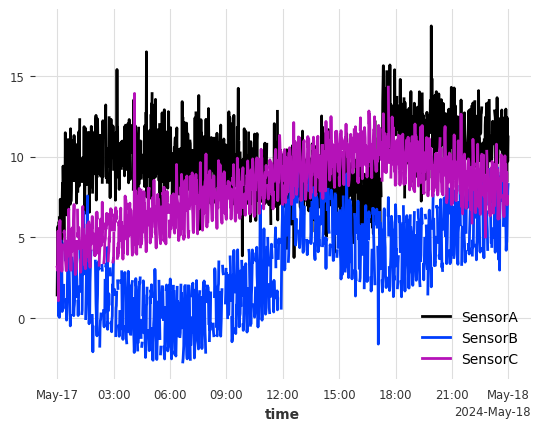

In [21]:
all_series= TimeSeries.from_csv('sensor_data.csv',time_col='time')
all_series.plot()

In [65]:
training, validation= series.split_after(0.85)

AttributeError: 'DataFrame' object has no attribute 'split_after'

In [18]:
model= ExponentialSmoothing()
model.fit(training)
pred=model.predict(len(validation))


ValueError: Model `ExponentialSmoothing` only supports univariate TimeSeries instances


ValueError: Model `ExponentialSmoothing` only supports univariate TimeSeries instances